In [1]:
from Truss_2D import Truss_2D

In [2]:
nodes = {1:[4.05,1.875], 2:[4.05,3.475], 3:[5.65,1.875], 4:[5.65,3.475], 5:[0,4.275], 6:[0,1.85], 7:[0,0], 8:[2.025,3.875], 9:[2.025,2.6625], 10:[2.025,0.9375]}
members = {1:[1,3], 2:[1,2], 3:[2,4], 4:[4,3], 5:[2,3], 6:[1,4],
           7:[7,10], 8:[10,1], 9:[6,9], 10:[9,2], 11:[5,8], 12:[8,2], 13:[5,9], 14:[6,10], 15:[9,1], 16:[8,9], 17:[9,10], 18:[5,6], 19:[6,7]}
supports = {5:[1,1], 6:[1,1], 7:[1,1]}
forces_1 = {2:[0,-40], 4:[0,-40]}
elasticity = {key: 200e6 for key in members}
cross_area = {key: 1.910e-3 for key in members}

In [3]:
Combo_1 = Truss_2D(nodes = nodes,
                   elements = members,
                   supports=supports,
                   forces=forces_1,
                   elasticity=elasticity,
                   cross_area=cross_area)

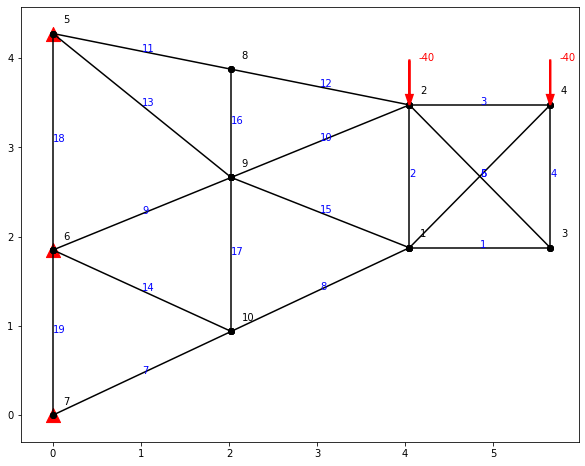

In [4]:
Combo_1.Draw_Truss_Setup(figure_size=[10,8], length_of_arrow=0.5, width_of_arrow=0.075)

In [5]:
Combo_1.Solve()

Truss Solved


In [6]:
Combo_1.reactions_

{5: [-105.0, 41.0], 6: [33.0, 5.0], 7: [72.0, 33.0]}

In [7]:
Pa = Combo_1.member_forces_

In [ ]:
Combo_1.displacements_

In [15]:
def Tension_Member(Pa, A, fy):
    Tension = {}
    
    for force in Pa:
        Pn = 0.60 * A[force] * fy
        DC = np.round(Pa[force] / Pn, 3)
        Tension.update({force: DC})
    return Tension

In [16]:
Pa

{1: -14.325,
 2: -28.65,
 3: 26.2625,
 4: -14.325,
 5: 21.4875,
 6: -37.00625,
 7: -78.73738,
 8: -89.43899,
 9: -26.08768,
 10: -33.77056,
 11: 72.42142,
 12: 71.59208,
 13: 43.67547,
 14: -9.28231,
 15: 44.69753,
 16: 0.0,
 17: 8.85797,
 18: 0.0,
 19: 0.0}

In [18]:
import numpy as np

In [19]:
Tension_Member(Pa, cross_area, 250000)

{1: -0.05,
 2: -0.1,
 3: 0.092,
 4: -0.05,
 5: 0.075,
 6: -0.129,
 7: -0.275,
 8: -0.312,
 9: -0.091,
 10: -0.118,
 11: 0.253,
 12: 0.25,
 13: 0.152,
 14: -0.032,
 15: 0.156,
 16: 0.0,
 17: 0.031,
 18: 0.0,
 19: 0.0}

In [ ]:
Pa[1]

In [ ]:
0.60 * cross_area[1] * 250000